# Финальное задание

## Предметная область: Игра Dota 2

[Dota 2](https://ru.wikipedia.org/wiki/Dota_2) — многопользовательская компьютерная игра жанра [MOBA](https://ru.wikipedia.org/wiki/MOBA). Игроки играют между собой матчи. В каждом матче участвует две команды, 5 человек в каждой. Одна команда играет за светлую сторону (The Radiant), другая — за тёмную (The Dire). Цель каждой команды — уничтожить главное здание базы противника (трон).

Существуют [разные режимы игры](http://dota2.gamepedia.com/Game_modes/ru), мы будем рассматривать режим [Captain's Mode](http://dota2.gamepedia.com/Game_modes/ru#Captain.27s_Mode), в формате которого происходит большая часть киберспортивных мероприятий по Dota 2.

### Как проходит матч

#### 1. Игроки выбирают героев

Всего в игре чуть более 100 различных героев (персонажей). В начале игры, команды в определенном порядке выбирают героев себе и запрещают выбирать определенных героев противнику (баны). Каждый игрок будет управлять одним героем, в рамках одного матча не может быть несколько одинаковых героев.  Герои различаются между собой своими характеристиками и способностями. От комбинации выбранных героев во многом зависит успех команды.

![](http://imgur.com/XFr4HYE.jpg)

#### 2. Основная часть

Игроки могут получать золото и опыт за убийство чужих героев или прочих юнитов. Накопленный опыт влияет на уровень героя, который в свою очередь позволяет улучшать способности. За накопленное золото игроки покупают предметы, которые улучшают характеристики героев или дают им новые способности.

После смерти герой отправляется в "таверну" и возрождается только по прошествии некоторого времени, таким образом команда на некоторое время теряет игрока, однако игрок может досрочно выкупить героя из таверны за определенную сумму золота.

В течение игры команды развивают своих героев, обороняют свою часть поля и нападают на вражескую.

![](http://imgur.com/5b0SlQb.jpg)

#### 3. Конец игры

Игра заканчивается, когда одна из команд разрушет определенное число "башен" противника и уничтожает трон.

![](http://imgur.com/Du79Kzf.jpg)

## Задача: предсказание победы по данным о первых 5 минутах игры

По первым 5 минутам игры предсказать, какая из команд победит: Radiant или Dire?

## Набор данных

Набор данных с матчами записан в файле `matches.jsonlines.bz2`.
В каталоге `dictionaries` приведены расшифровки идентификаторов, которые присутствуют в записях матчей.

#### Чтение информации о матчах

Информация о матчах записана в сжатом текстовом файле `matches.jsonlines.bz2`, каждая строчка которого содержит объект в формате [JSON](https://ru.wikipedia.org/wiki/JSON). Запись в формате JSON преобразуется в python-объект при помощи стандартного модуля `json`. Пример чтения матчей:

In [3]:
import json
import bz2

with bz2.BZ2File('./matches.jsonlines.bz2') as matches_file:
    for line in matches_file:
        match = json.loads(line)
        print(match)
        # Обработка матча
        break

{'picks_bans': [{'is_pick': False, 'hero_id': 95, 'order': 0, 'team': 1}, {'is_pick': False, 'hero_id': 39, 'order': 1, 'team': 0}, {'is_pick': False, 'hero_id': 99, 'order': 2, 'team': 1}, {'is_pick': False, 'hero_id': 41, 'order': 3, 'team': 0}, {'is_pick': True, 'hero_id': 42, 'order': 4, 'team': 1}, {'is_pick': True, 'hero_id': 68, 'order': 5, 'team': 0}, {'is_pick': True, 'hero_id': 22, 'order': 6, 'team': 0}, {'is_pick': True, 'hero_id': 64, 'order': 7, 'team': 1}, {'is_pick': False, 'hero_id': 73, 'order': 8, 'team': 1}, {'is_pick': False, 'hero_id': 11, 'order': 9, 'team': 0}, {'is_pick': False, 'hero_id': 97, 'order': 10, 'team': 1}, {'is_pick': False, 'hero_id': 93, 'order': 11, 'team': 0}, {'is_pick': True, 'hero_id': 98, 'order': 12, 'team': 0}, {'is_pick': True, 'hero_id': 47, 'order': 13, 'team': 1}, {'is_pick': True, 'hero_id': 88, 'order': 14, 'team': 0}, {'is_pick': True, 'hero_id': 110, 'order': 15, 'team': 1}, {'is_pick': False, 'hero_id': 48, 'order': 16, 'team': 0}

#### Описание полей в записи матча

```python
{
    "match_id": 247,            # идентификатор матча
    "start_time": 1430514316,   # дата/время начала матча, unixtime
    "lobby_type": 0,            # тип комнаты, в которой собираются игроки 
                                #   (расшифровка в dictionaries/lobbies.csv)
 
    # стадия выбора героев
    "picks_bans": [
        {
            "order": 0,       # порядковый номер действия
            "is_pick": false, # true если команда выбирает героя, false — если банит
            "team": 1,        # команда, совершающая действие (0 — Radiant, 1 — Dire)
            "hero_id": 95     # герой, связанный с действием 
                              #    (расшифровка в dictionaries/heroes.csv)
        }, 
        ...
    ],

    # информация про каждого игрока, список ровно из 10 элементов
    # игроки с индексами от 0 до 4 — из команды Radiant, от 5 до 9 — Dire
    "players": [ 
        { 
        
            # герой игрока (расшифровка в dictionaries/heroes.csv)
            "hero_id": 67,  

            # временные ряды (отсчеты указаны в поле "times")
            "xp_t": [0, 13, 115, 177, 335, ...],   # опыт
            "gold_t": [0, 99, 243, 343, 499, ...], # золото + стоимость всех купленных вещей (net worth)
            "lh_t": [0, 0, 2, 2, 2, ...],          # количество убитых юнитов (не героев) противника

            # список событий: улучшение способностей героя
            "ability_upgrades": [
                {
                    "time": 51,      # игровое время
                    "level": 1,      # уровень игрока, на котором произошло улучшение
                    "ability": 5334  # способность, которая была улучшена 
                                     # (расшифровка в dictionaries/abilities.csv)
                }, 
                ...
            ],

            # список событий: убийства
            "kills_log": [
                {
                    "time": 831,    # игровое время
                    "player": 7,    # индекс игрока, чей герой был убит 
                                    #   (не заполнено, если был убит не герой)
                    "unit": "npc_dota_hero_viper" # тип убитого юнита
                }, 
                ...
            ],

            # список событий: покупка предметов
            "purchase_log": [
                {
                    "time": -73,     # игровое время
                                     #   точка отсчета игрового времени (ноль) начинается через
                                     #   несколько минут после фактического начала матча, поэтому
                                     #   время некоторых событий может быть отрицательным
                    "item_id": 44    # купленный предмер (расшифровка в dictionaries/items.csv)
                }, 
                ...
            ]

            # список событий: выкуп героя из таверны
            "buyback_log": [
                {"time": 2507},
                ...
            ],

            # список событий: установка героем "наблюдателей", позволяющих команде 
            # следить за чатью игрового поля на некотором расстоянии от точки установки
            "obs_log": [
                {
                    "time": 1711,    # игровое время установки
                    "xy": [111, 130] # координаты игрового поля
                }, 
                ...
            ],
            "sen_log": [], # аналогично полю obs_log, другой тип "наблюдателя"

        },
        ...
    ],
    
    # отсчеты игрового времени, в которые вычисляются значения временных рядов
    "times": [0, 60, 120, 180, ...],

    # ключевые события игры
    "objectives": [
        {
            "time": 198,           # время события
            "type": "firstblood",  # тип события
            "player1": 6,          # параметры события, могут содержать
            "player2": 1           #   индексы игроков (player), 
                                   #   номер команды (team, 0 — Radiant, 1 — Dire)
        }, 
        {
            "time": 765, 
            "type": "tower_kill", 
            "player": 7, 
            "team": 1
        }, 
        ...
    ]
    
    # итог матча (отсутствует в тестовых матчах)
    "finish": {
        "duration": 2980,             # длительность в секундах
        "radiant_win": false,         # true, если победила команда Radiant
        "tower_status_radiant": 0,    # состояние башен у команд к концу игры
        "tower_status_dire": 1972,    #   (см. описание битовой маски)
        "barracks_status_dire": 63,   # состояние бараков у команд к концу игры
        "barracks_status_radiant": 0  #   (см. описание битовой маски)
    }
}
```

#### Описание полей состояния башен и бараков

Состояние башен к концу игры задается целым числом, закодировано в битах:

```
┌─┬─┬─┬─┬─────────────────────── Not used.
│ │ │ │ │ ┌───────────────────── Ancient Bottom
│ │ │ │ │ │ ┌─────────────────── Ancient Top
│ │ │ │ │ │ │ ┌───────────────── Bottom Tier 3
│ │ │ │ │ │ │ │ ┌─────────────── Bottom Tier 2
│ │ │ │ │ │ │ │ │ ┌───────────── Bottom Tier 1
│ │ │ │ │ │ │ │ │ │ ┌─────────── Middle Tier 3
│ │ │ │ │ │ │ │ │ │ │ ┌───────── Middle Tier 2
│ │ │ │ │ │ │ │ │ │ │ │ ┌─────── Middle Tier 1
│ │ │ │ │ │ │ │ │ │ │ │ │ ┌───── Top Tier 3
│ │ │ │ │ │ │ │ │ │ │ │ │ │ ┌─── Top Tier 2
│ │ │ │ │ │ │ │ │ │ │ │ │ │ │ ┌─ Top Tier 1
│ │ │ │ │ │ │ │ │ │ │ │ │ │ │ │
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
```

Состояние бараков к концу игры закодировано в битах целого числа:

```
┌─┬───────────── Not used.
│ │ ┌─────────── Bottom Ranged
│ │ │ ┌───────── Bottom Melee
│ │ │ │ ┌─────── Middle Ranged
│ │ │ │ │ ┌───── Middle Melee
│ │ │ │ │ │ ┌─── Top Ranged
│ │ │ │ │ │ │ ┌─ Top Melee
│ │ │ │ │ │ │ │
0 0 0 0 0 0 0 0
```

## Извлечение признаков

Скрипт extract_features.py производит извлечение признаков из известной информации о матче за первые 5 игровых минут, составляет из них таблицу. Таблица поможет вам быстрее сформировать матрицу объект-признак, вектор ответов и начать применять методы машинного обучения для решения поставленной задачи.

Признаки, представленные в таблице `features.csv`, по мнению экспертов в предметной области являются наиболее важными для решения задачи предсказания победы команды. Тем не менее, не обязательно использовать эти признаки в исходном виде для применения методов машинного обучения — вы можете сделать новые признаки из имеющихся. Более того, признаки в файле `features.csv` содержат не всю информацию, известную про матч за первые 5 игровых минут. Вы можете использовать скрипт `extract_features.py` как пример и добавлять свои признаки для улучшения качества предсказания.

#### Пример чтения файла с признаками

In [5]:
import pandas as pd
features = pd.read_csv('./features.csv', index_col='match_id')

features.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


#### Описание признаков в таблице

- `match_id`: идентификатор матча в наборе данных
- `start_time`: время начала матча (unixtime)
- `lobby_type`: тип комнаты, в которой собираются игроки (расшифровка в `dictionaries/lobbies.csv`)
- Наборы признаков для каждого игрока (игроки команды Radiant — префикс `rN`, Dire — `dN`):
    - `r1_hero`: герой игрока (расшифровка в dictionaries/heroes.csv)
    - `r1_level`: максимальный достигнутый уровень героя (за первые 5 игровых минут)
    - `r1_xp`: максимальный полученный опыт
    - `r1_gold`: достигнутая ценность героя
    - `r1_lh`: число убитых юнитов
    - `r1_kills`: число убитых игроков
    - `r1_deaths`: число смертей героя
    - `r1_items`: число купленных предметов
- Признаки события "первая кровь" (first blood). Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
    - `first_blood_time`: игровое время первой крови
    - `first_blood_team`: команда, совершившая первую кровь (0 — Radiant, 1 — Dire)
    - `first_blood_player1`: игрок, причастный к событию
    - `first_blood_player2`: второй игрок, причастный к событию
- Признаки для каждой команды (префиксы `radiant_` и `dire_`)
    - `radiant_bottle_time`: время первого приобретения командой предмета "bottle"
    - `radiant_courier_time`: время приобретения предмета "courier" 
    - `radiant_flying_courier_time`: время приобретения предмета "flying_courier" 
    - `radiant_tpscroll_count`: число предметов "tpscroll" за первые 5 минут
    - `radiant_boots_count`: число предметов "boots"
    - `radiant_ward_observer_count`: число предметов "ward_observer"
    - `radiant_ward_sentry_count`: число предметов "ward_sentry"
    - `radiant_first_ward_time`: время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля
- Итог матча (данные поля отсутствуют в тестовой выборке, поскольку содержат информацию, выходящую за пределы первых 5 минут матча)
    - `duration`: длительность
    - `radiant_win`: 1, если победила команда Radiant, 0 — иначе
    - Состояние башен и барраков к концу матча (см. описание полей набора данных)
        - `tower_status_radiant`
        - `tower_status_dire`
        - `barracks_status_radiant`
        - `barracks_status_dire`

## Метрика качества

В качестве метрики качества мы будем использовать площадь под ROC-кривой (AUC-ROC). Обратите внимание, что AUC-ROC — это метрика качества для алгоритма, выдающего оценки принадлежности первому классу. Оба алгоритма, которые будут использоваться в проекте — градиентный бустинг, и логистическая регрессия — умеют выдавать такие оценки. Для этого нужно получать предсказания с помощью функции predict_proba. Она возвращает два столбца: первый содержит оценки принадлежности нулевому классу, второй — первому классу. Вам нужны значения из второго столбца:
```python
pred = clf.predict_proba(X_test)[:, 1]
```

## Руководство по решению

Вам необходимо провести описанные ниже два этапа исследования, написать по результатам каждого этапа небольшой отчет (ниже указаны вопросы, ответы на которые должны содержаться в отчете), и предоставить для ревью данный отчет и код, с помощью которого вы выполнили задание.

**Обратите внимание:** высокое качество работы на кросс-валидации (близкое к 100%) — это в первую очередь повод задуматься о том, правильно ли вы обучаете модель. Возможно, вы заглядываете в будущее или настраиваетесь на неправильном наборе признаков.

### Подход 1: градиентный бустинг "в лоб"
Один из самых универсальных алгоритмов, изученных в нашем курсе, является градиентный бустинг. Он не очень требователен к данным, восстанавливает нелинейные зависимости, и хорошо работает на многих наборах данных, что и обуславливает его популярность. Вполне разумной мыслью будет попробовать именно его в первую очередь.

1. Считайте таблицу с признаками из файла features.csv с помощью кода, приведенного выше. Удалите признаки, связанные с итогами матча (они помечены в описании данных как отсутствующие в тестовой выборке).
2. Проверьте выборку на наличие пропусков с помощью функции count(), которая для каждого столбца показывает число заполненных значений. Много ли пропусков в данных? Запишите названия признаков, имеющих пропуски, и попробуйте для любых двух из них дать обоснование, почему их значения могут быть пропущены.
3. Замените пропуски на нули с помощью функции fillna(). На самом деле этот способ является предпочтительным для логистической регрессии, поскольку он позволит пропущенному значению не вносить никакого вклада в предсказание. Для деревьев часто лучшим вариантом оказывается замена пропуска на очень большое или очень маленькое значение — в этом случае при построении разбиения вершины можно будет отправить объекты с пропусками в отдельную ветвь дерева. Также есть и другие подходы — например, замена пропуска на среднее значение признака. Мы не требуем этого в задании, но при желании попробуйте разные подходы к обработке пропусков и сравните их между собой.
3. Какой столбец содержит целевую переменную? Запишите его название.
4. Забудем, что в выборке есть категориальные признаки, и попробуем обучить градиентный бустинг над деревьями на имеющейся матрице "объекты-признаки". Зафиксируйте генератор разбиений для кросс-валидации по 5 блокам (KFold), не забудьте перемешать при этом выборку (shuffle=True), поскольку данные в таблице отсортированы по времени, и без перемешивания можно столкнуться с нежелательными эффектами при оценивании качества. Оцените качество градиентного бустинга (GradientBoostingClassifier) с помощью данной кросс-валидации, попробуйте при этом разное количество деревьев (как минимум протестируйте следующие значения для количества деревьев: 10, 20, 30). Долго ли настраивались классификаторы? Достигнут ли оптимум на испытанных значениях параметра n_estimators, или же качество, скорее всего, продолжит расти при дальнейшем его увеличении?

##### Что указать в отчете
В отчете по данному этапу вы должны ответить на следующие вопросы:
1. Какие признаки имеют пропуски среди своих значений? Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков)?
2. Как называется столбец, содержащий целевую переменную?
3. Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями? Инструкцию по измерению времени можно найти ниже по тексту. Какое качество при этом получилось? Напомним, что в данном задании мы используем метрику качества AUC-ROC.
4. Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге? Что бы вы предложили делать, чтобы ускорить его обучение при увеличении количества деревьев?


##### Рекомендации и советы

- Если все работает очень медлено:
   - Используйте для обучения и кросс-валидации не всю выборку, а некоторое ее подмножество — например, половину объектов. Подмножество лучше всего брать случайным, а не формировать его из первых m объектов.
   - Попробуйте упростить модель — например, уменьшить глубину деревьев в градиентом бустинге (max_depth).
   
##### Измерение времени работы кода
```python
import time
import datetime

start_time = datetime.datetime.now()

time.sleep(3) # вместо этой строчки разместить замеряемый код

print 'Time elapsed:', datetime.datetime.now() - start_time
```

In [6]:
import pandas as pd
features = pd.read_csv('./features.csv', index_col='match_id')

features.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


In [20]:
X = features.drop(['duration', 'radiant_win', \
                   'tower_status_radiant', \
                   'tower_status_dire', \
                   'barracks_status_radiant', \
                   'barracks_status_dire'], axis=1)

X.fillna(-999999, axis=1, inplace=True)
X = X.values

Y = features['radiant_win'].values

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

import time
import datetime

SEED = 241

In [81]:
def train_validate(n_estimators=[10, 20, 30]):
    kf = KFold(n_splits=5, shuffle=True, random_state=SEED)
    acc = []
    for k in n_estimators:
        clf = GradientBoostingClassifier(random_state=SEED, n_estimators=k, verbose=False)

        start_time = datetime.datetime.now()

        score = cross_val_score(clf, X, Y, scoring="roc_auc", cv=kf, n_jobs=-1)

        print('Time elapsed:', datetime.datetime.now() - start_time)

        score = np.mean(score)
        acc.append(score)
    return acc

In [82]:
features = pd.read_csv('./features.csv', index_col='match_id')
X = features.drop(['duration', 'radiant_win', \
                   'tower_status_radiant', \
                   'tower_status_dire', \
                   'barracks_status_radiant', \
                   'barracks_status_dire'], axis=1)

X.fillna(-999999, axis=1, inplace=True)
X = X.values


Y = features['radiant_win'].values

Time elapsed: 0:00:12.631619
Time elapsed: 0:00:24.494974
Time elapsed: 0:00:36.523846
Time elapsed: 0:00:48.781023
Time elapsed: 0:01:01.109708
Time elapsed: 0:01:13.915303


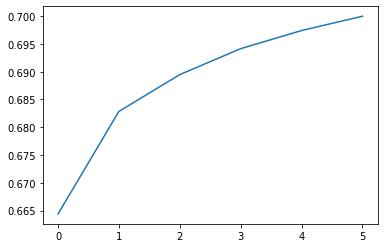

In [84]:
acc = train_validate(list(range(10, 70, 10)))
plt.plot(acc)

In [85]:
acc

[0.6643877206345741,
 0.6828535735340823,
 0.6894805902164476,
 0.6941548666055508,
 0.697416018942387,
 0.6999936313380642]

# Отчёт

### Какие признаки имеют пропуски среди своих значений? Что могут означать пропуски в этих признаках (ответьте на этот вопрос для двух любых признаков)?


- `radiant_bottle_time`: время первого приобретения командой предмета "bottle"
- `radiant_flying_courier_time`: время приобретения предмета "flying_courier" 

Пропуск в этих признаках может значить, что команда еще не успела за 5 мин приобрести предметы "bottle", "flying_courier"

### Как называется столбец, содержащий целевую переменную?


radiant_win

### Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями? Инструкцию по измерению времени можно найти ниже по тексту. Какое качество при этом получилось? Напомним, что в данном задании мы используем метрику качества AUC-ROC.
    
40 c, AUC-ROC = 0.69

### Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге? Что бы вы предложили делать, чтобы ускорить его обучение при увеличении количества деревьев?

Да, имеет. При увеличении кол-ва деревьев в композиции качество алгоритма на валидации увеличивается
Идеи для ускорения обучения:
- n_jobs=-1 в cross_val_score. Дало ускорение ~ 2 раза



### Подход 2: логистическая регрессия

Линейные методы работают гораздо быстрее композиций деревьев, поэтому кажется разумным воспользоваться именно ими для ускорения анализа данных. Одним из наиболее распространенных методов для классификации является логистическая регрессия.

**Важно:** не забывайте, что линейные алгоритмы чувствительны к масштабу признаков! Может пригодиться sklearn.preprocessing.StandartScaler.

1. Оцените качество логистической регрессии (sklearn.linear_model.LogisticRegression с L2-регуляризацией) с помощью кросс-валидации по той же схеме, которая использовалась для градиентного бустинга. Подберите при этом лучший параметр регуляризации (C). Какое наилучшее качество у вас получилось? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?
2. Среди признаков в выборке есть категориальные, которые мы использовали как числовые, что вряд ли является хорошей идеей. Категориальных признаков в этой задаче одиннадцать: lobby_type и r1_hero, r2_hero, ..., r5_hero, d1_hero, d2_hero, ..., d5_hero. Уберите их из выборки, и проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Изменилось ли качество? Чем вы можете это объяснить?
3. На предыдущем шаге мы исключили из выборки признаки rM_hero и dM_hero, которые показывают, какие именно герои играли за каждую команду. Это важные признаки — герои имеют разные характеристики, и некоторые из них выигрывают чаще, чем другие. Выясните из данных, сколько различных идентификаторов героев существует в данной игре (вам может пригодиться фукнция unique или value_counts).
4. Воспользуемся подходом "мешок слов" для кодирования информации о героях. Пусть всего в игре имеет N различных героев. Сформируем N признаков, при этом i-й будет равен нулю, если i-й герой не участвовал в матче; единице, если i-й герой играл за команду Radiant; минус единице, если i-й герой играл за команду Dire. Ниже вы можете найти код, который выполняет данной преобразование. Добавьте полученные признаки к числовым, которые вы использовали во втором пункте данного этапа.
5. Проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Какое получилось качество? Улучшилось ли оно? Чем вы можете это объяснить?
6. Постройте предсказания вероятностей победы команды Radiant для тестовой выборки с помощью лучшей из изученных моделей (лучшей с точки зрения AUC-ROC на кросс-валидации). Убедитесь, что предсказанные вероятности адекватные — находятся на отрезке [0, 1], не совпадают между собой (т.е. что модель не получилась константной).

##### Что указать в отчете
В отчете по данному этапу вы должны ответить на следующие вопросы:
1. Какое качество получилось у логистической регрессии над всеми исходными признаками? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?
2. Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? Чем вы можете объяснить это изменение?
3. Сколько различных идентификаторов героев существует в данной игре?
4. Какое получилось качество при добавлении "мешка слов" по героям? Улучшилось ли оно по сравнению с предыдущим вариантом? Чем вы можете это объяснить?
5. Какое минимальное и максимальное значение прогноза на тестовой выборке получилось у лучшего из алгоритмов?


##### Код для формирования "мешка слов" по героям
```python
# N — количество различных героев в выборке
X_pick = np.zeros((data.shape[0], N))

for i, match_id in enumerate(data.index):
    for p in xrange(5):
        X_pick[i, data.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, data.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1
```

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

In [167]:
def train_validate(X, Y, param=[1e-2, 1, 1e4]):
    kf = KFold(n_splits=5, shuffle=True, random_state=SEED)
    acc = []
    for k in param:
        clf = LogisticRegression(penalty='l2', random_state=SEED, C=k, verbose=False, max_iter=1000)

        start_time = datetime.datetime.now()

        score = cross_val_score(clf, X, Y, scoring="roc_auc", cv=kf, n_jobs=-1)

        print('Time elapsed:', datetime.datetime.now() - start_time)

        score = np.mean(score)
        acc.append(score)
    return acc

In [100]:
features = pd.read_csv('./features.csv', index_col='match_id')
X = features.drop(['duration', 'radiant_win', \
                   'tower_status_radiant', \
                   'tower_status_dire', \
                   'barracks_status_radiant', \
                   'barracks_status_dire'], axis=1)

In [ ]:
# Заполняем медианой пропуски
t = X.count()
columns_wtih_na = list(t[t < X.shape[0]].index)
for col in columns_wtih_na:
    X[col] = X[col].fillna(X[col].median())
    
X = X.values
scaler = StandardScaler()
X = scaler.fit_transform(X)


Y = features['radiant_win'].values

Time elapsed: 0:00:01.811003
Time elapsed: 0:00:01.722106
Time elapsed: 0:00:01.784430
Time elapsed: 0:00:01.593974
Time elapsed: 0:00:01.781528
Time elapsed: 0:00:01.772290
Time elapsed: 0:00:01.664792
Time elapsed: 0:00:01.757351
Time elapsed: 0:00:01.735179
Time elapsed: 0:00:01.744678


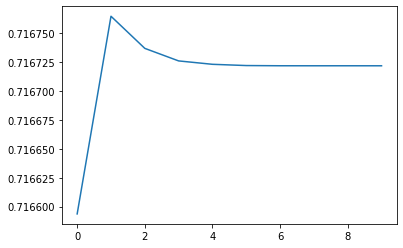

In [99]:
C = np.logspace(-3, 3, num=10)
acc = train_validate(X, Y, C)
plt.plot(acc)

In [92]:
acc

[0.7165935780416867,
 0.7167648984336329,
 0.7167370563520544,
 0.7167261854086957,
 0.7167232447744165,
 0.7167221644759212,
 0.7167219866261678,
 0.7167219675931635,
 0.7167219739326406,
 0.7167219633402004]

In [67]:
C_best = C[np.argmax(acc)]
C_best, acc[np.argmax(acc)]

(0.004641588833612777, 0.7167648984336329)

#   удалим кат. признаки и проведем кросс валидацию

In [72]:
features = pd.read_csv('./features.csv', index_col='match_id')
X = features.drop(['duration', 'radiant_win', \
                   'tower_status_radiant', \
                   'tower_status_dire', \
                   'barracks_status_radiant', \
                   'barracks_status_dire'], axis=1)

to_delete = ['lobby_type', 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', \
             'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']
X = X.drop(to_delete, axis=1)


# Заполняем медианой пропуски
t = X.count()
columns_wtih_na = list(t[t < X.shape[0]].index)
for col in columns_wtih_na:
    X[col] = X[col].fillna(X[col].median())
    
X = X.values
scaler = StandardScaler()
X = scaler.fit_transform(X)


Y = features['radiant_win'].values

Time elapsed: 0:00:01.000527
Time elapsed: 0:00:01.509093
Time elapsed: 0:00:01.529258
Time elapsed: 0:00:01.727941
Time elapsed: 0:00:01.577421
Time elapsed: 0:00:01.585005
Time elapsed: 0:00:01.529197
Time elapsed: 0:00:01.569545
Time elapsed: 0:00:01.605586
Time elapsed: 0:00:01.570272


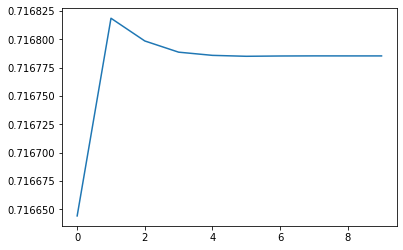

In [77]:
C = np.logspace(-3, 3, num=10)
acc = train_validate(X, Y, C)
plt.plot(acc)

In [78]:
acc

[0.716644250194048,
 0.7168186774884939,
 0.7167986236908759,
 0.7167887439585334,
 0.7167859263074109,
 0.7167851065690701,
 0.716785362841492,
 0.716785462417149,
 0.7167854370096576,
 0.7167854327574561]

In [79]:
C_best = C[np.argmax(acc)]
C_best, acc[np.argmax(acc)]

(0.004641588833612777, 0.7168186774884939)

# One-hot кат. признаков

In [151]:
features = pd.read_csv('./features.csv', index_col='match_id')
X = features.drop(['duration', 'radiant_win', \
                   'tower_status_radiant', \
                   'tower_status_dire', \
                   'barracks_status_radiant', \
                   'barracks_status_dire'], axis=1)



In [152]:
X.shape

(97230, 102)

In [153]:
ar = np.array([])

for p in range(1, 6):
    ar = np.hstack([ar, X[f'r{p}_hero'].values, X[f'd{p}_hero'].values])
print(np.unique(ar))
N = len(np.unique(ar)) # кол-во уник. героев

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.
  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.
  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.
  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.
  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99.
 100. 101. 102. 103. 104. 105. 106. 109. 110. 112.]


In [154]:
N

108

In [155]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(np.unique(ar))
le.transform(np.unique(ar))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107])

In [156]:
# N — количество различных героев в выборке
X_pick = np.zeros((X.shape[0], N))

for i, match_id in enumerate(X.index):
    for p in range(5):
        col_idx = le.transform([X.loc[match_id, 'r%d_hero' % (p+1)]])
        X_pick[i, col_idx[0]] = 1
        
        col_idx = le.transform([X.loc[match_id, 'd%d_hero' % (p+1)]])
        X_pick[i, col_idx[0]] = -1

In [157]:
X_pick.shape

(97230, 108)

In [158]:
to_delete = ['lobby_type', 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', \
             'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']
X = X.drop(to_delete, axis=1)


# Заполняем медианой пропуски
t = X.count()
columns_wtih_na = list(t[t < X.shape[0]].index)
for col in columns_wtih_na:
    X[col] = X[col].fillna(X[col].median())
    
X = X.values
scaler = StandardScaler()
X = scaler.fit_transform(X)


Y = features['radiant_win'].values

In [159]:
# добавляю кат. признаки о героях
X = np.hstack([X, X_pick])

In [160]:
X.shape

(97230, 199)

Time elapsed: 0:00:02.714174
Time elapsed: 0:00:03.585001
Time elapsed: 0:00:04.749967
Time elapsed: 0:00:05.933072
Time elapsed: 0:00:06.441323
Time elapsed: 0:00:06.429203
Time elapsed: 0:00:06.277883
Time elapsed: 0:00:06.916813
Time elapsed: 0:00:06.280410
Time elapsed: 0:00:06.391054


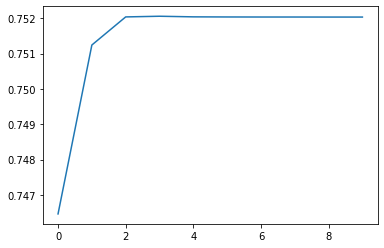

In [168]:
C = np.logspace(-3, 3, num=10)
acc = train_validate(X, Y, C)
plt.plot(acc)

In [169]:
acc

[0.7464624504960419,
 0.7512421724067017,
 0.7520372581235618,
 0.7520562876308282,
 0.7520390868348805,
 0.7520357508629807,
 0.7520344381939376,
 0.7520341687724341,
 0.7520332110235058,
 0.7520329674528303]

In [170]:
C_best = C[np.argmax(acc)]
C_best, acc[np.argmax(acc)]

(0.1, 0.7520562876308282)

# Отчёт

### Какое качество получилось у логистической регрессии над всеми исходными признаками? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?
С = 0.0046, AUC-ROC = 0.717
Логистическая регрессия независимо от параметра С обучается ~ 1 c, a время обучения град. бустинга сильно зависит от кол-ва деревье в композиции, и уже при кол-ве деревье=10 равно 14 с, т.е. в 14 раз дольше. Причем кол-во деревье в композии сильно влиет на сложность модели, а как мы видели выше, при увелечинии кол-ва деревье, качество на валидации растет. Возможно, град. бустинг недообучился

#### Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? Чем вы можете объяснить это изменение?

Ни качество, ни лучшее С не изменилось. Возможно, лог. рег. зануляет веса при этих признаках

### Сколько различных идентификаторов героев существует в данной игре?

108

### Какое получилось качество при добавлении "мешка слов" по героям? Улучшилось ли оно по сравнению с предыдущим вариантом? Чем вы можете это объяснить?

0.752 AUC-ROC. Качество улучшилось на 0.036 по сравнению с лог. рег. без кат. признаков. Возможно, это связано с тем, что новое признаковое описание с one-hot категориальных признаков по героям более линейно разделимо

### Какое минимальное и максимальное значение прогноза на тестовой выборке получилось у лучшего из алгоритмов?
0.00846658, 0.9963984 у лог. рег с C=0.1


## Проверка финальной модели

После того как вы провели все эксперименты и выбрали лучшую модель, можете проверить ее качество на тестовых матчах. Выборка тестовых матчей собрана в файле `matches_test.jsonlines.bz2`. В отличие от основного набора матчей, в тестовых матчах есть только та информация, которая известна на момент первых 5 игровых минут, результат матча — неизвестен. Таблица признаков для тестовых матчей — `features_test.csv`.

Для всех матчей из тестового набора предскажите вероятность победы Radiant, запишите предсказания в CSV файл с колонками `match_id` (идентификатор матча) и `radiant_win` — предсказанная вероятность. Файл с предсказаниями должен выглядеть примерно следующим образом:

```
match_id,radiant_win
1,0.51997370502
4,0.51997370502
15,0.51997370502
...
```

Отправьте решение на Kaggle в соревнование: Dota 2: Win Probability Prediction.

Ссылка на соревнование: [Dota 2: Win Probability Prediction](https://kaggle.com/join/coursera_ml_dota2_contest)

In [182]:
%%time
features = pd.read_csv('./features.csv', index_col='match_id')

X = features.drop(['duration', 'radiant_win', \
                   'tower_status_radiant', \
                   'tower_status_dire', \
                   'barracks_status_radiant', \
                   'barracks_status_dire'], axis=1)

ar = np.array([])

for p in range(1, 6):
    ar = np.hstack([ar, X[f'r{p}_hero'].values, X[f'd{p}_hero'].values])
N = len(np.unique(ar)) # кол-во уник. героев

le = LabelEncoder()
le.fit(np.unique(ar))

# N — количество различных героев в выборке
X_pick = np.zeros((X.shape[0], N))

for i, match_id in enumerate(X.index):
    for p in range(5):
        col_idx = le.transform([X.loc[match_id, 'r%d_hero' % (p+1)]])
        X_pick[i, col_idx[0]] = 1
        
        col_idx = le.transform([X.loc[match_id, 'd%d_hero' % (p+1)]])
        X_pick[i, col_idx[0]] = -1
        
to_delete = ['lobby_type', 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', \
             'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']
X = X.drop(to_delete, axis=1)


# Заполняем медианой пропуски
t = X.count()
columns_wtih_na = list(t[t < X.shape[0]].index)
for col in columns_wtih_na:
    X[col] = X[col].fillna(X[col].median())
    
X = X.values
scaler = StandardScaler()
X = scaler.fit_transform(X)


Y = features['radiant_win'].values

# добавляю кат. признаки о героях
X = np.hstack([X, X_pick])

CPU times: user 1min 1s, sys: 138 ms, total: 1min 1s
Wall time: 1min 1s


In [183]:
%%time
clf = LogisticRegression(penalty='l2', random_state=SEED, C=0.1, verbose=False, max_iter=1000)
clf.fit(X, Y)

CPU times: user 34.9 s, sys: 16.9 s, total: 51.8 s
Wall time: 5.19 s


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=241, solver='lbfgs', tol=0.0001, verbose=False,
                   warm_start=False)

In [191]:
%%time
X_test = pd.read_csv('./features_test.csv', index_col='match_id')


# N — количество различных героев в выборке
X_pick = np.zeros((X_test.shape[0], N))

for i, match_id in enumerate(X_test.index):
    for p in range(5):
        col_idx = le.transform([X_test.loc[match_id, 'r%d_hero' % (p+1)]])
        X_pick[i, col_idx[0]] = 1
        
        col_idx = le.transform([X_test.loc[match_id, 'd%d_hero' % (p+1)]])
        X_pick[i, col_idx[0]] = -1
        
to_delete = ['lobby_type', 'r1_hero', 'r2_hero', 'r3_hero', 'r4_hero', 'r5_hero', \
             'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']
X_test = X_test.drop(to_delete, axis=1)


# Заполняем медианой пропуски
t = X_test.count()
columns_wtih_na = list(t[t < X_test.shape[0]].index)
for col in columns_wtih_na:
    X_test[col] = X_test[col].fillna(X_test[col].median())
    
X_test = X_test.values
X_test = scaler.transform(X_test)


# добавляю кат. признаки о героях
X_test = np.hstack([X_test, X_pick])

CPU times: user 10.8 s, sys: 6.45 ms, total: 10.8 s
Wall time: 10.8 s


In [192]:
X_test.shape

(17177, 199)

In [193]:
features_test.shape

(17177, 102)

In [195]:
pred.shape

(17177, 1)

In [197]:
pred = clf.predict_proba(X_test)[:, 1]
pred = pd.DataFrame(pred, columns=['radiant_win'])
pd.concat([features_test.reset_index()[['match_id']], pred], axis=1).to_csv('submit.csv', index=False)

In [201]:
min(pred.values), max(pred.values)

(array([0.00846658]), array([0.9963984]))

### Что еще попробовать?

Разумеется, можно попробовать еще очень много разных идей, которые помогут вам получить еще более высокий результат на kaggle. Вот лишь несколько возможных вариантов:
1. Про каждого из игроков есть достаточно много показателей: максимальный опыт, число смертей и т.д. (см. список выше). Можно попробовать просуммировать или усредних их, получив агрегированные показатели для всей команды.
2. В сырых данных (файл matches.jsonlines.bz2) содержится очень много информации, которую мы пока не использовали. Вы можете, например, составить "мешки слов" для покупок различных предметов (то есть кодировать информацию о том, сколько раз каждая команда покупала тот или иной предмет). Обратите внимание, что при этом вы можете получить слишком большое количество признаков, для которых может иметь смысл сделать понижение размерности с помощью метода главных компонент.
3. Можно сформировать признаки про изменения способностей героев в течение матча (ability_upgrades).
4. В этом задании используются только градиентный бустинг и логистическая регрессия — но ведь мы изучали и другие модели! Можно попробовать метод k ближайших соседей, SVM, случайный лес и так далее.

## Про задачу и финальное задание

#### Почему именно такая задача?

- Публикация реальных данных из индустриальных задач — очень смелый шаг для компании. Мало кто (даже Яндекс) может на такое пойти. Гораздо проще (а порой и интереснее) воспользоваться данными из открытых источников.
- Публичные датасеты из интернета для решения реальных бизнес-задач мало пригодны, собственно поэтому они и лежат в открытом доступе.
- Мы предпочли сделать игрушечную задачу на реальных данных, вместо реальной задачи на игрушечных данных.
- Задача прогнозирования победы — игрушечная, но вот лишь небольшой перечень реальных задач, на которые она похожа:
    - предсказания вероятности покупки услуги клиентом банка
    - предсказание вероятности оттока клиента к другому поставщику услуг
    - ... (подумайте над другими примерами)

#### Задание слишком простое. Что еще можно сделать?

Ответить на вопрос: какое минимальное число минут матча необходимо знать, для того чтобы в 80% матчей верно угадывать победившую сторону? А с точностью 90%? Дайте свой ответ на этот вопрос и докажите что такой точности действительно можно достичь, построив модель и качественно провалидировав ее. Насколько матчи в игре Dota 2 предсказуемы?

Напишите об этом статью, расскажите всем, и приходите к нам на собеседование.

#### Где взяли данные?

Набор данных был сделан на основе выгрузки [YASP 3.5 Million Data Dump](http://academictorrents.com/details/5c5deeb6cfe1c944044367d2e7465fd8bd2f4acf) реплеев матчей Dota 2 с сайта [yasp.co](http://yasp.co/). За выгрузку огромное спасибо Albert Cui and Howard Chung and Nicholas Hanson-Holtry. Лицензия на выгрузку: CC BY-SA 4.0.

#### Как сформировали выборку?

Оригинальная выгрузка матчей была очищена, в предложенном наборе присутствуют матчи:
  - сыгранные с 2015-05-01 до 2015-12-17
  - длительностью не менее 15 минут
  - убраны матчи с неполной информацией (например: отсутвует информация про игроков)

Из всего датасета 15% случайных записей были выделены в тестовое множество.

Для того чтобы размотивировать участников соревнования на Kaggle занимать высокие места читерскими методами (например, скачав оригинальный набор данных и подсмотрев ответы на тестовом множестве матчей), мы произвели минимальную обфускацию данных, т.е. немного запутали датасет:
   - поменяли идентификаторы матчей
   - время начала каждого матча сдвинули на значение случайной величины, нормально распределенной со стандартным отклонением в 1 сутки